### Notebook index

[3 Minimal examples](03-minimal.ipynb)  
[4 Plotting chromosomes](04-plotting.ipynb)   
[5 Multiple OTUs](05-multiple.ipynb)    
[6 Changing units](06-units.ipynb)  
[7 GISH](07-gish.ipynb)  
[8 Groups](08-groups.ipynb)  
[9 Circular Plots](09-circular.ipynb)  
[10 Plotting alongside phylogeny](10-phylogeny.ipynb)  
[11 Citrus](11-citrushelp.ipynb)  
[12 Human Karyotype](12-human.ipynb)  

# Changing Units

In [2]:
# General jupyter instructions

In [3]:
# press Ctrl + Enter to RUN active cell

# SHOW keyboard shortcuts Ctrl + M then H (only jupyter notebooks and colab)

# Ctrl + D (or X) DELETE a line of code

# press Ctrl + M to escape from cell (opposite to ENTER)

# then !
# B to ADD cell below or A above
# M to turn code cell into MARKDOWN
# Y turn markdown to CODE
# O to toggle OUTPUT
# D D to DELETE cell

# If in jupyter-lab:
# collapse cell clicking in the blue left bar
# use the settings menu to use the dark theme

# if in colab:
# remove bar at 80 in tools, preferences, 80 -> 0

In [4]:
# install if necessary

if (system.file(package = "idiogramFISH") == '') {
  install.packages("idiogramFISH")
}

library(idiogramFISH)

version 2.0.6 See help: ?idiogramFISH - browseVignettes('idiogramFISH') - https://ferroao.gitlab.io/manualidiogramfish



## Using bases instead of micrometers - no. cen.

Create some data in millions of bases:

In [5]:
bigdfChrSizeHoloMb <- bigdfChrSizeHolo # included in idiogramFISH
bigdfChrSizeHoloMb$chrSize <- bigdfChrSizeHoloMb$chrSize * 98000000

bigdfMarkPosHoloMb <- bigdfMarkPosHolo
bigdfMarkPosHoloMb$markPos <- bigdfMarkPosHoloMb$markPos * 98000000
bigdfMarkPosHoloMb$markSize<- bigdfMarkPosHoloMb$markSize * 98000000

### Plotting

In the plot length is shown in Mb

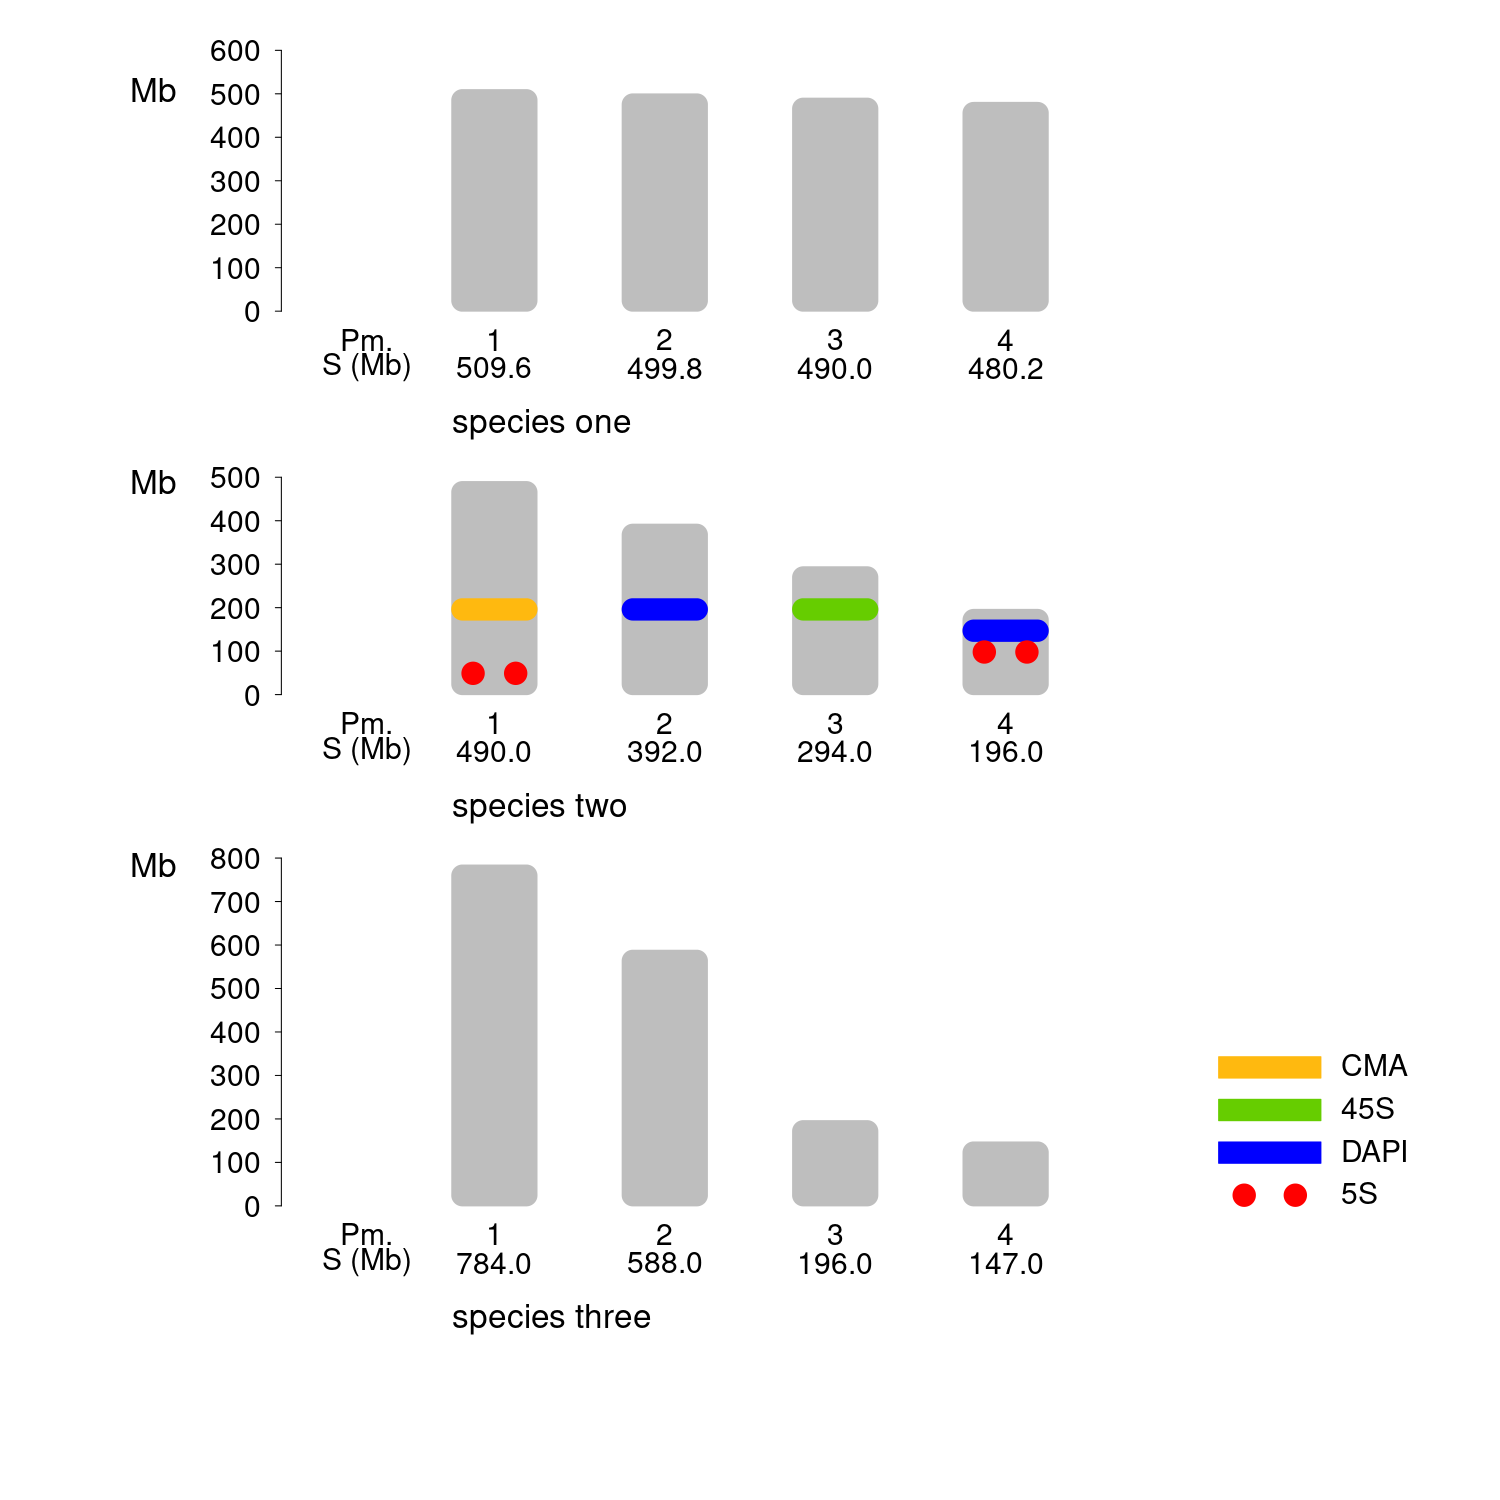

In [16]:

# png("bigdfChrSizeHolo2.png", width=700, height=600)
# par(mar=c(1,1,1,1))
par(mar=rep(0,4)) 

options(repr.plot.width = 1500/200, repr.plot.height = 1500/200, repr.plot.res = 200)
suppressMessages(
plotIdiograms(dfChrSize=bigdfChrSizeHoloMb,  # chr. size data.frame
              dfMarkColor=dfMarkColor,       # df of mark style
              dfMarkPos=bigdfMarkPosHoloMb,  # df of mark positions
              
              markDistType="cen",            # distance to mark is to its center
              squareness=4,                  # vertices squareness of chr. and marks 
              distTextChr = .5,              # separ. chr. to text
              
              karHeight = 2,                 # rel. karyotype height
              karHeiSpace = 4,               # karyotype height including spacing
              karSepar=TRUE,                 # reduce spacing among karyotypes 
              amoSepar = 1,                  # depends on karSepar, amount of sep.
              
              chrId="simple",                # chr. names not "original"
              chrSize=TRUE,                  # show chr. size under chr.
              indexIdTextSize=.9,            # font size of chr names and indices
              karIndex = FALSE,              # do not add karyotype asymmetry index
              
              rulerNumberSize=.9,            # font size of ruler
              rulerPos = 0,                  # position of ruler
              ruler.tck= -.004,              # ruler tick length and orient.
              xPosRulerTitle = 3.5,          # modifies position of ruler title (Mb)
              
              markLabelSize=.9,              # font size of legend
              legendWidth = 1.2,             # width of legends
              
              xlimLeftMod = 1,               # modify left argument of xlim
              ylimBotMod=.4                  # modify bottom argument of ylim
              ,chromatids=FALSE              # do not show chromatids
              )        
)
#dev.off()

</div>

For another example see:
https://stackoverflow.com/questions/33727432/how-to-plot-positions-along-a-chromosome-graphic/57153497#57153497


## Using `threshold` to fix scale

The default value of `35` for `threshold` may shrink one of the OTUs of this example more than expected. In this case `threshold` must be bigger.

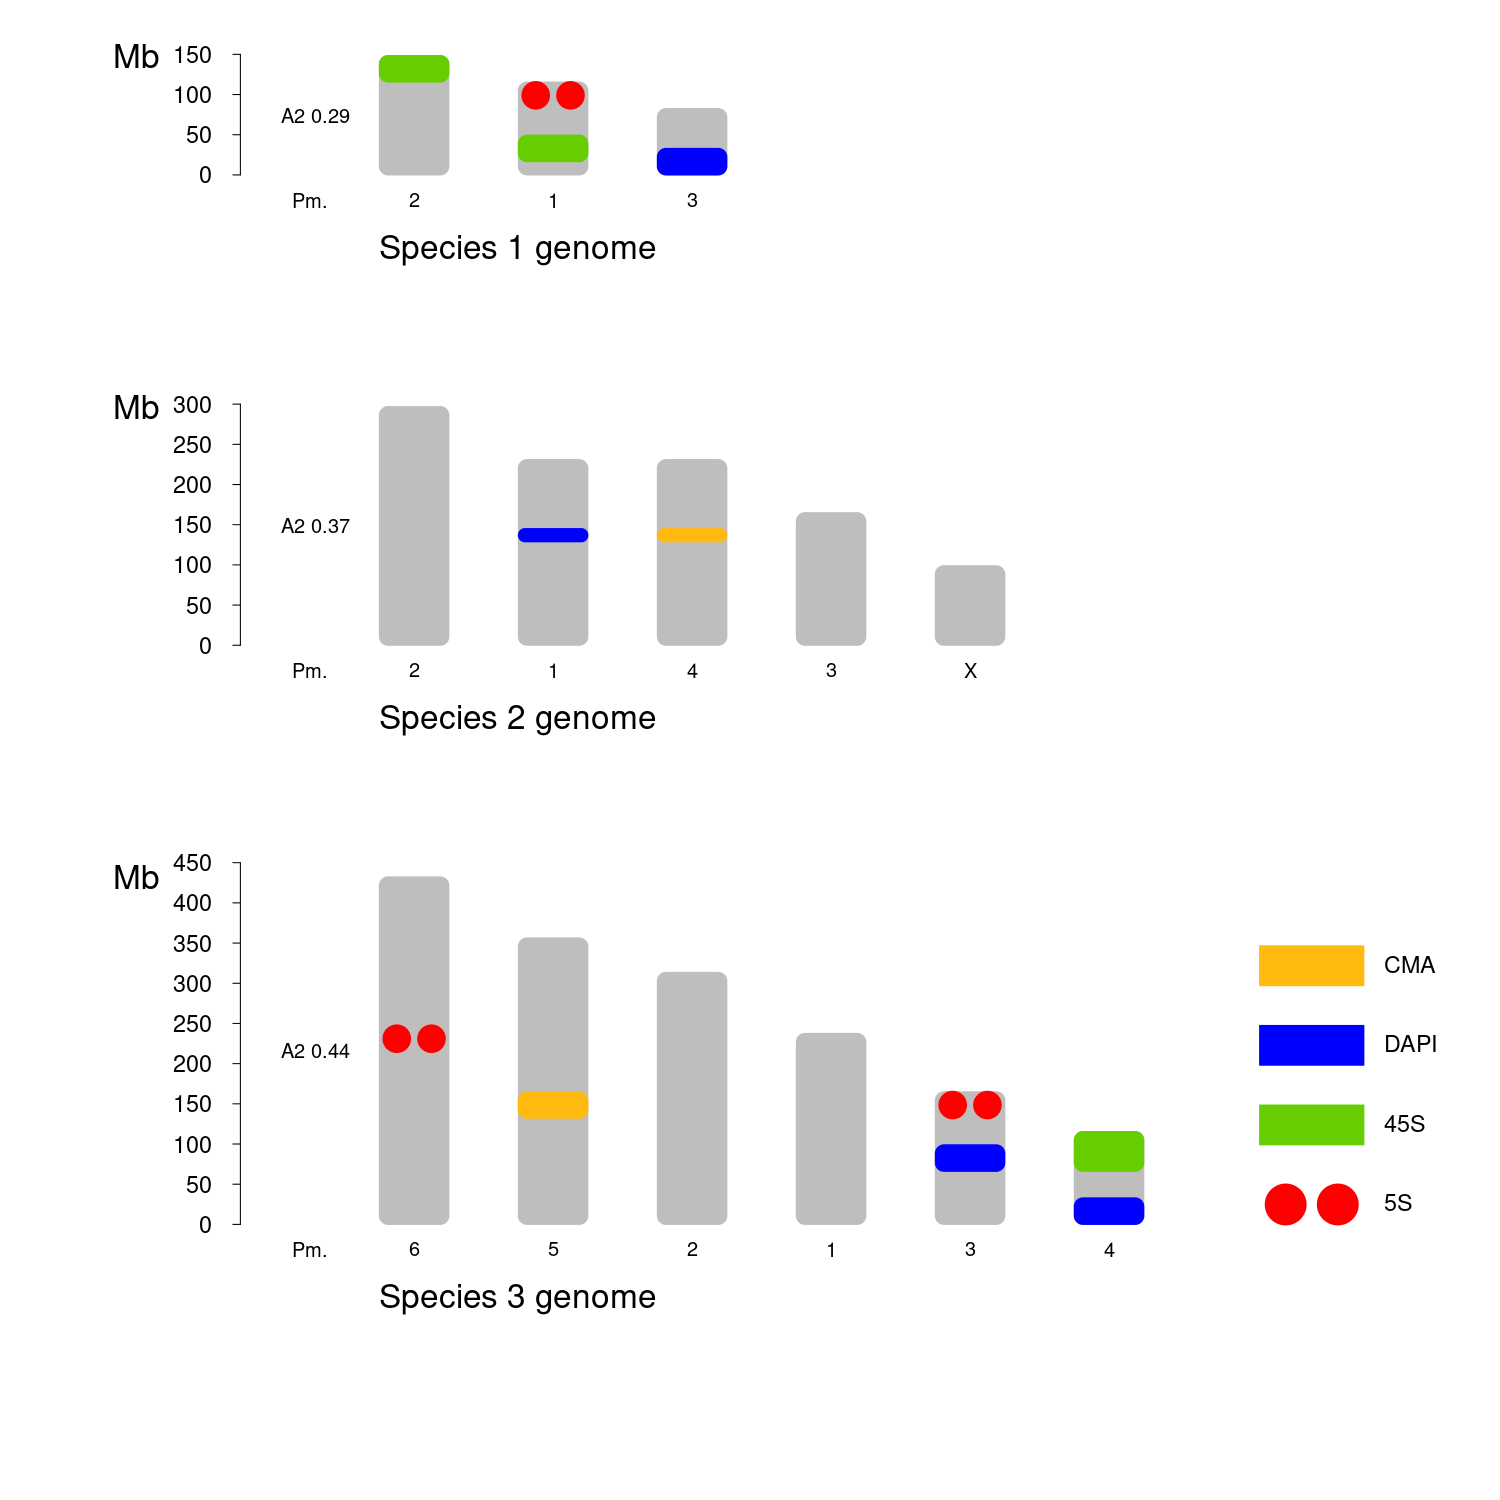

In [15]:
# fig.width=7, fig.height=7
bigdfOfChrSize3_100Mb<-bigdfOfChrSize3Mb
bigdfOfChrSize3_100Mb$chrSize<-bigdfOfChrSize3Mb$chrSize*33

bigdfOfMarks3_100Mb<-bigdfOfMarks3Mb
bigdfOfMarks3_100Mb$markPos<-bigdfOfMarks3_100Mb$markPos*33
bigdfOfMarks3_100Mb$markSize<-bigdfOfMarks3_100Mb$markSize*33

par(mar=rep(0,4))
options(repr.plot.width = 1500/200, repr.plot.height = 1500/200, repr.plot.res = 200)
suppressMessages(
plotIdiograms(dfChrSize   = bigdfOfChrSize3_100Mb,  # chr. size data.frame
              dfMarkPos   = bigdfOfMarks3_100Mb,    # mark position df
              
              chrWidth=.6,                # width of chr.
              chrSpacing = .6,            # space among chr.
              karHeight = 3,              # kar. height without interspace
              karHeiSpace = 5,            # vertical size of karyotype including spacer
              amoSepar =2,                # separ. among kar.
              
              indexIdTextSize=.6,         # font size of chr. name and indices
              markLabelSize=.7,           # font size of mark legends
              distTextChr = .65,          # separation among chr. names and indices
              
              fixCenBorder = TRUE         # use chrColor as border color of cen. or cen. marks
              ,legendWidth = 1.5          # legend items width
              
              ,xPosRulerTitle = 3.5       # position of Mb (title) in ruler               
              ,rulerPos= 0,               # ruler position
              ruler.tck=-0.005,           # ticks of ruler size and orientation
              rulerNumberPos =.7,         # position of numbers in ruler
              rulerNumberSize=.7,         # font size of ruler numbers
              rulerInterval = 1.5,        # ruler interval for micrometeres
              rulerIntervalMb = 50,       # ruler interval for Mb

              ylimBotMod = 0.4,           # modify ylim bottom argument
              ylimTopMod = 0              # modify ylim top argument
              ,chromatids=FALSE           # do not show chromatids
              
              ,threshold = 90             # this will allow to not to shrink data greater than 350 Mb
)
)

## Plot data in micrometers and bases

Info in number of bases can be combined in the same plot with info. in micrometers.

Here the new mark style `cenStyle` is used to add centromeres to "holocen." (genomes).

To make the rules fit better, having less excess of length over chr., use `ceilingFactor`.

By default 5S are plotted as dots, to change this behavior make your own dfMarkColor data.frame

Not enough colors in mycolor parameter, will be recycled



markName,markColor,style
<chr>,<chr>,<chr>
5S,red,dots
45S,chartreuse3,square
DAPI,dodgerblue,square
CMA,darkgoldenrod1,square
cDAPI,dodgerblue,cenStyle
cCMA,darkgoldenrod1,cenStyle
sim. cen.,NA,cenStyle
S58A,red,upArrow


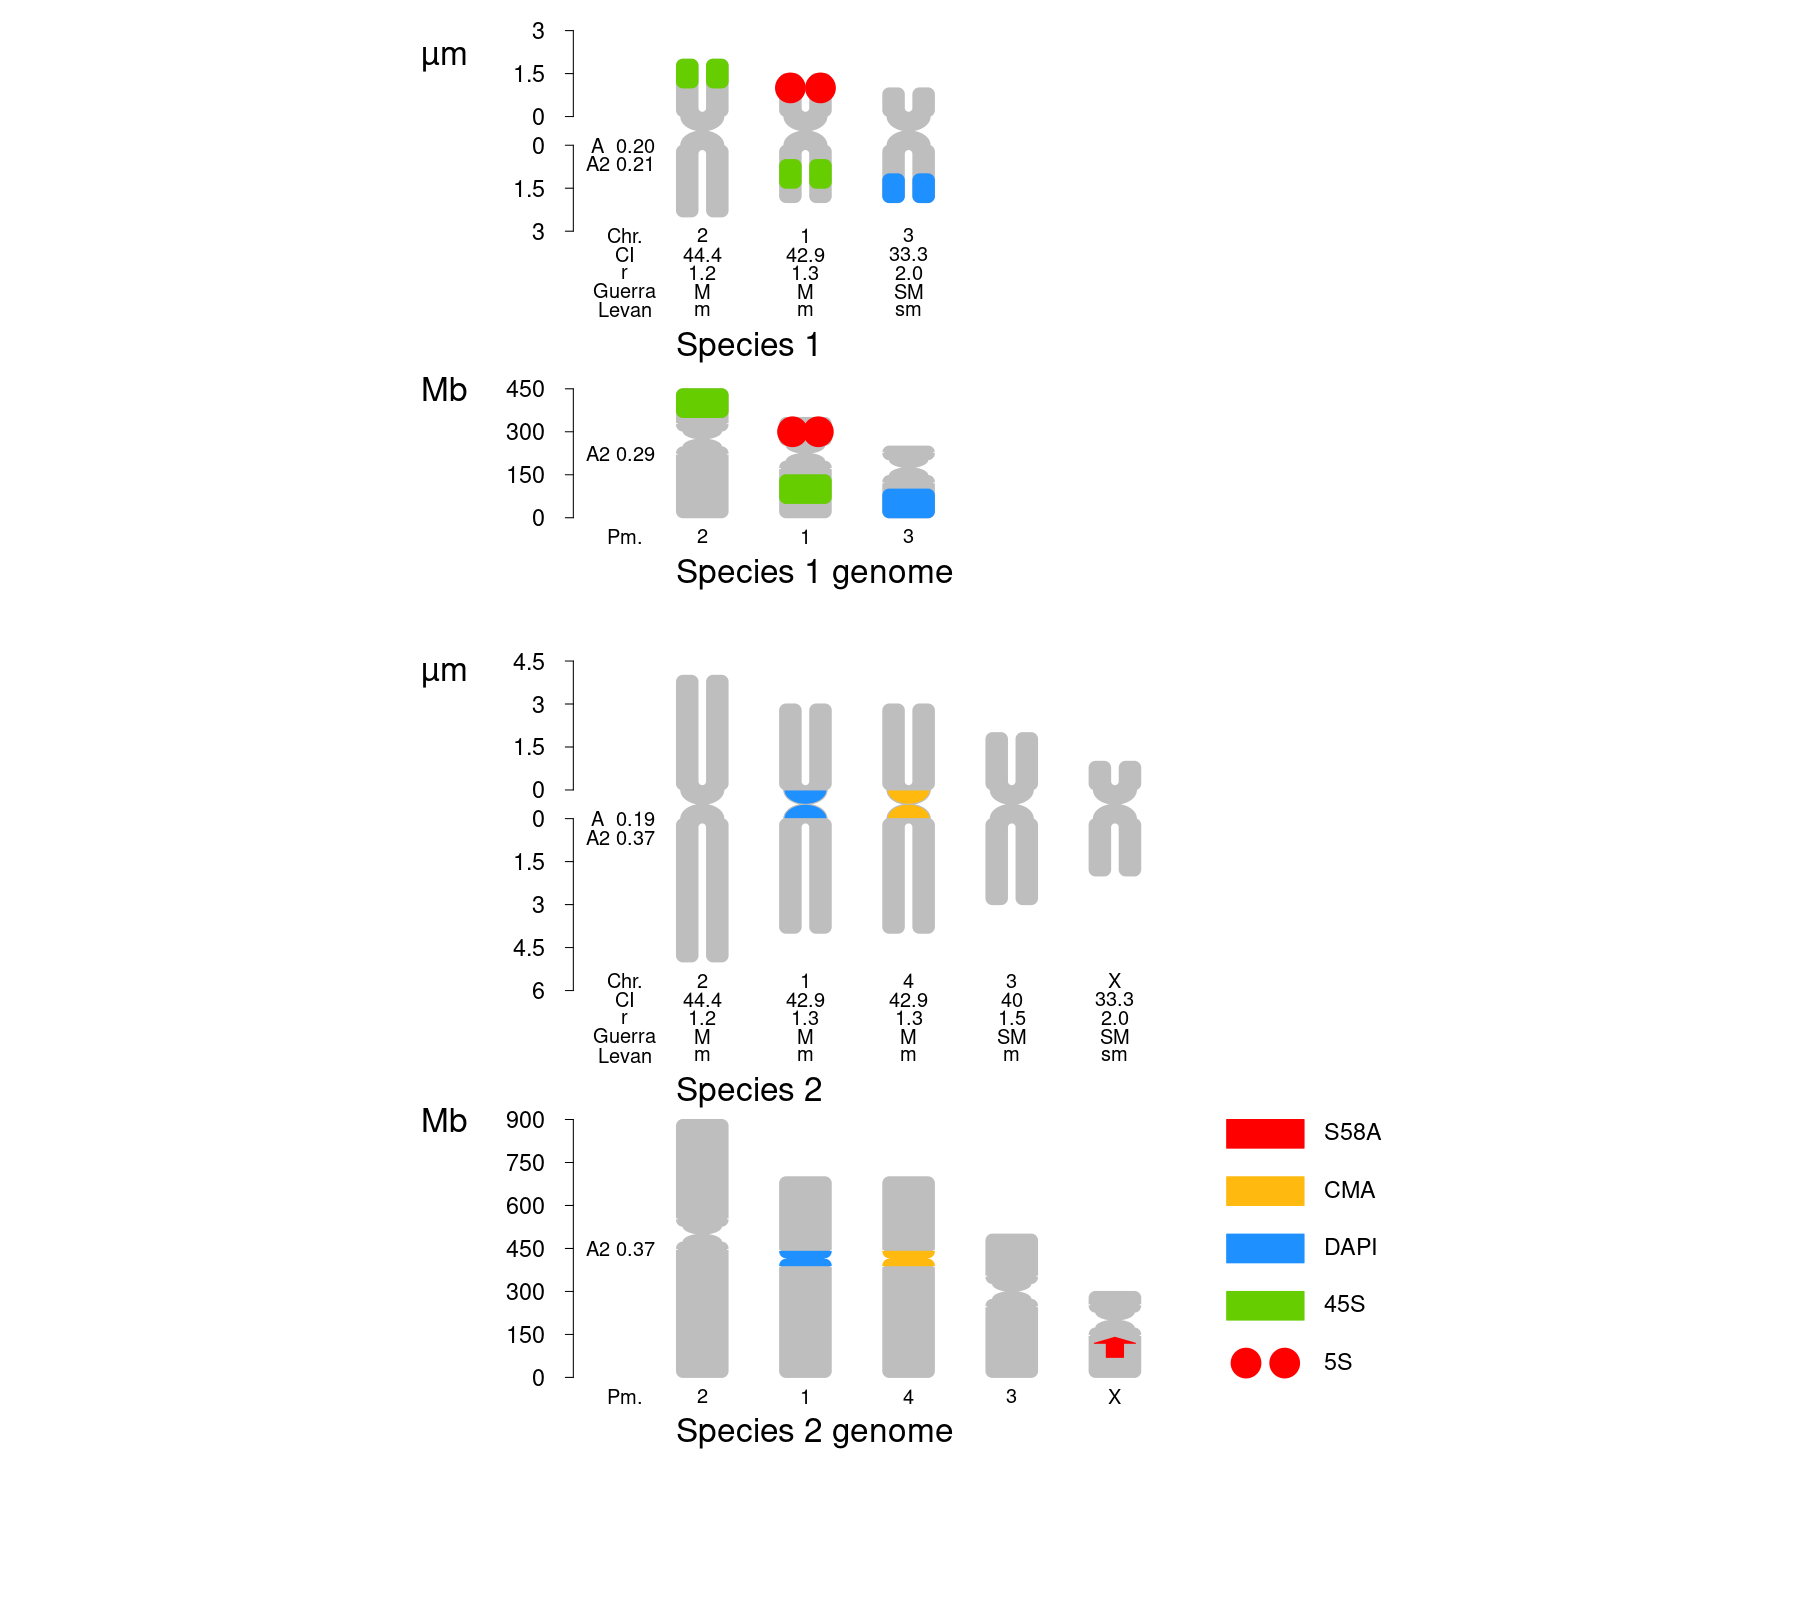

In [28]:
#fig.width=10, fig.height=10
# modify data in millions to hundreds of millions of Mb
bigdfOfChrSize3_100Mb<-bigdfOfChrSize3Mb[1:8,]
bigdfOfChrSize3_100Mb$chrSize<-bigdfOfChrSize3_100Mb$chrSize*100

bigdfOfMarks3_100Mb<-bigdfOfMarks3Mb
bigdfOfMarks3_100Mb$markPos <-bigdfOfMarks3_100Mb$markPos *100
bigdfOfMarks3_100Mb$markSize<-bigdfOfMarks3_100Mb$markSize*100

# merge data.frames in micrometers and number of bases
mixedThreeSpChrSize <- plyr::rbind.fill(bigdfOfChrSize[1:8,], bigdfOfChrSize3_100Mb)
# sort by OTU name
mixedThreeSpChrSize <- mixedThreeSpChrSize[order(mixedThreeSpChrSize$OTU),]

# add cenStyle marks to simulate centromeres in karyo. in Mb (holocen.)
# compare rulers
bigdfSimCenMarks<- bigdfOfChrSize3_100Mb
bigdfSimCenMarks$markPos<-bigdfSimCenMarks$chrSize/2

bigdfSimCenMarks$markName<-"sim. cen."
bigdfSimCenMarks$chrSize<-NULL

# merge marks in micrometers and bases
mixedThreeSpMarks <- plyr::rbind.fill(bigdfOfMarks , bigdfOfMarks3_100Mb,bigdfSimCenMarks)

# remove cenStyle mark info.
mixedThreeSpMarks<-mixedThreeSpMarks[which(!( mixedThreeSpMarks$OTU %in% "Species 2 genome" & 
                          mixedThreeSpMarks$chrName %in% c(1,4) &
                          mixedThreeSpMarks$markName %in% "sim. cen.") ),]

# constric. marks
mixedThreeSpMarks[which(mixedThreeSpMarks$OTU %in% "Species 2 genome" & 
                          mixedThreeSpMarks$chrName %in% c(1,4) ),]$markName<-c("cDAPI","cCMA")
                        
# add arrow mark
mixedThreeSpMarks <- dplyr::bind_rows(mixedThreeSpMarks , mixedThreeSpMarks[nrow(mixedThreeSpMarks),] )
mixedThreeSpMarks[nrow(mixedThreeSpMarks),]$markName<-"S58A"
mixedThreeSpMarks[nrow(mixedThreeSpMarks),]$markPos<-.7e+08
mixedThreeSpMarks[nrow(mixedThreeSpMarks),]$markSize<-.7e+08
  
dfMarkColorAndStyle<-makedfMarkColorMycolors(unique(mixedThreeSpMarks$markName),
                                                            c("red","chartreuse3","dodgerblue","darkgoldenrod1","dodgerblue","darkgoldenrod1","black")
)

# d.f. of marks'styles

dfMarkColorAndStyle$style[5:7]<-"cenStyle"
dfMarkColorAndStyle$markColor[7]<-NA
dfMarkColorAndStyle$style[8]<-"upArrow"

dfMarkColorAndStyle

par(mar=rep(0,4))
options(repr.plot.width = 1800/200, repr.plot.height = 1600/200, repr.plot.res = 200)
suppressMessages(
plotIdiograms(dfChrSize   = mixedThreeSpChrSize,  # chr. size data.frame
              dfMarkPos   = mixedThreeSpMarks,    # mark position df
              dfMarkColor = dfMarkColorAndStyle,
              
              chrWidth=.6,                # width of chr.
              chrSpacing = .6,            # space among chr.
              karHeight = 3,              # kar. height without interspace
              karHeiSpace = 5,            # vertical size of karyotype including spacer
              amoSepar =2,                # separ. among kar.
              
              indexIdTextSize=.6,         # font size of chr. name and indices
              markLabelSize=.7,           # font size of mark legends
              distTextChr = .65,          # separation among chr. names and indices
              lwd.mimicCen = 1.5,         # constric. line width
              
              legendWidth = 1.5,          # legend items width
              fixCenBorder = TRUE,        # use chrColor as border color of cen. or cen. marks
              
              xPosRulerTitle = 4.5,       # position of Mb (title) in ruler
              rulerPos= 0,                # ruler position
              ruler.tck=-0.005,           # ticks of ruler size and orientation
              rulerNumberPos =.7,         # position of numbers in ruler
              rulerNumberSize=.7,         # font size of ruler numbers
              rulerInterval = 1.5,        # ruler interval for micrometeres
              rulerIntervalMb = 150,      # ruler interval for Mb
              ceilingFactor = 1,          # affects rounding for ruler max. value
              
              ylimBotMod = 0.4,           # modify ylim bottom argument
              ylimTopMod = 0              # modify ylim top argument
              ,holocenNotAsChromatids = TRUE # do not use chromatids in holocen.
              ,pattern="^c"               # regex pattern to remove from mark names
              ,remSimiMarkLeg = TRUE      # remove pseudoduplicate names arising from pattern removal
)
)

</div>

Let's explore those data.frames

<div class="pre-scrollx">

In [9]:
head(mixedThreeSpChrSize,6)

,OTU,chrName,shortArmSize,longArmSize,chrSize
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,Species 1,1,1.5,2.0,NA
2,Species 1,2,2.0,2.5,NA
3,Species 1,3,1.0,2.0,NA
9,Species 1 genome,1,NA,NA,3.5e+08
10,Species 1 genome,2,NA,NA,4.5e+08
11,Species 1 genome,3,NA,NA,2.5e+08


</div>

<div class="verysmall">

</div>

In [10]:
mixedThreeSpMarks[which(mixedThreeSpMarks$OTU %in% c("Species 1","Species 1 genome") ),] 

,OTU,chrName,markName,chrRegion,markDistCen,markSize,markPos
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,Species 1,1,5S,p,0.5,1e+00,NA
2,Species 1,1,45S,q,0.5,1e+00,NA
3,Species 1,2,45S,p,1.0,1e+00,NA
4,Species 1,3,DAPI,q,1.0,1e+00,NA
13,Species 1 genome,1,5S,NA,NA,1e+08,2.50e+08
14,Species 1 genome,1,45S,NA,NA,1e+08,5.00e+07
15,Species 1 genome,2,45S,NA,NA,1e+08,3.50e+08
16,Species 1 genome,3,DAPI,NA,NA,1e+08,0.00e+00
25,Species 1 genome,1,sim. cen.,NA,NA,NA,1.75e+08


<div class="verysmall">

## Use cM as units

Info in cM can be combined in the same plot with info. in micrometers.

To make the rules fit better, having less excess of length over chr., use `ceilingFactor`.

By default 5S are plotted as dots, to change this behavior make your own dfMarkColor data.frame

Not enough colors in mycolor parameter, will be recycled



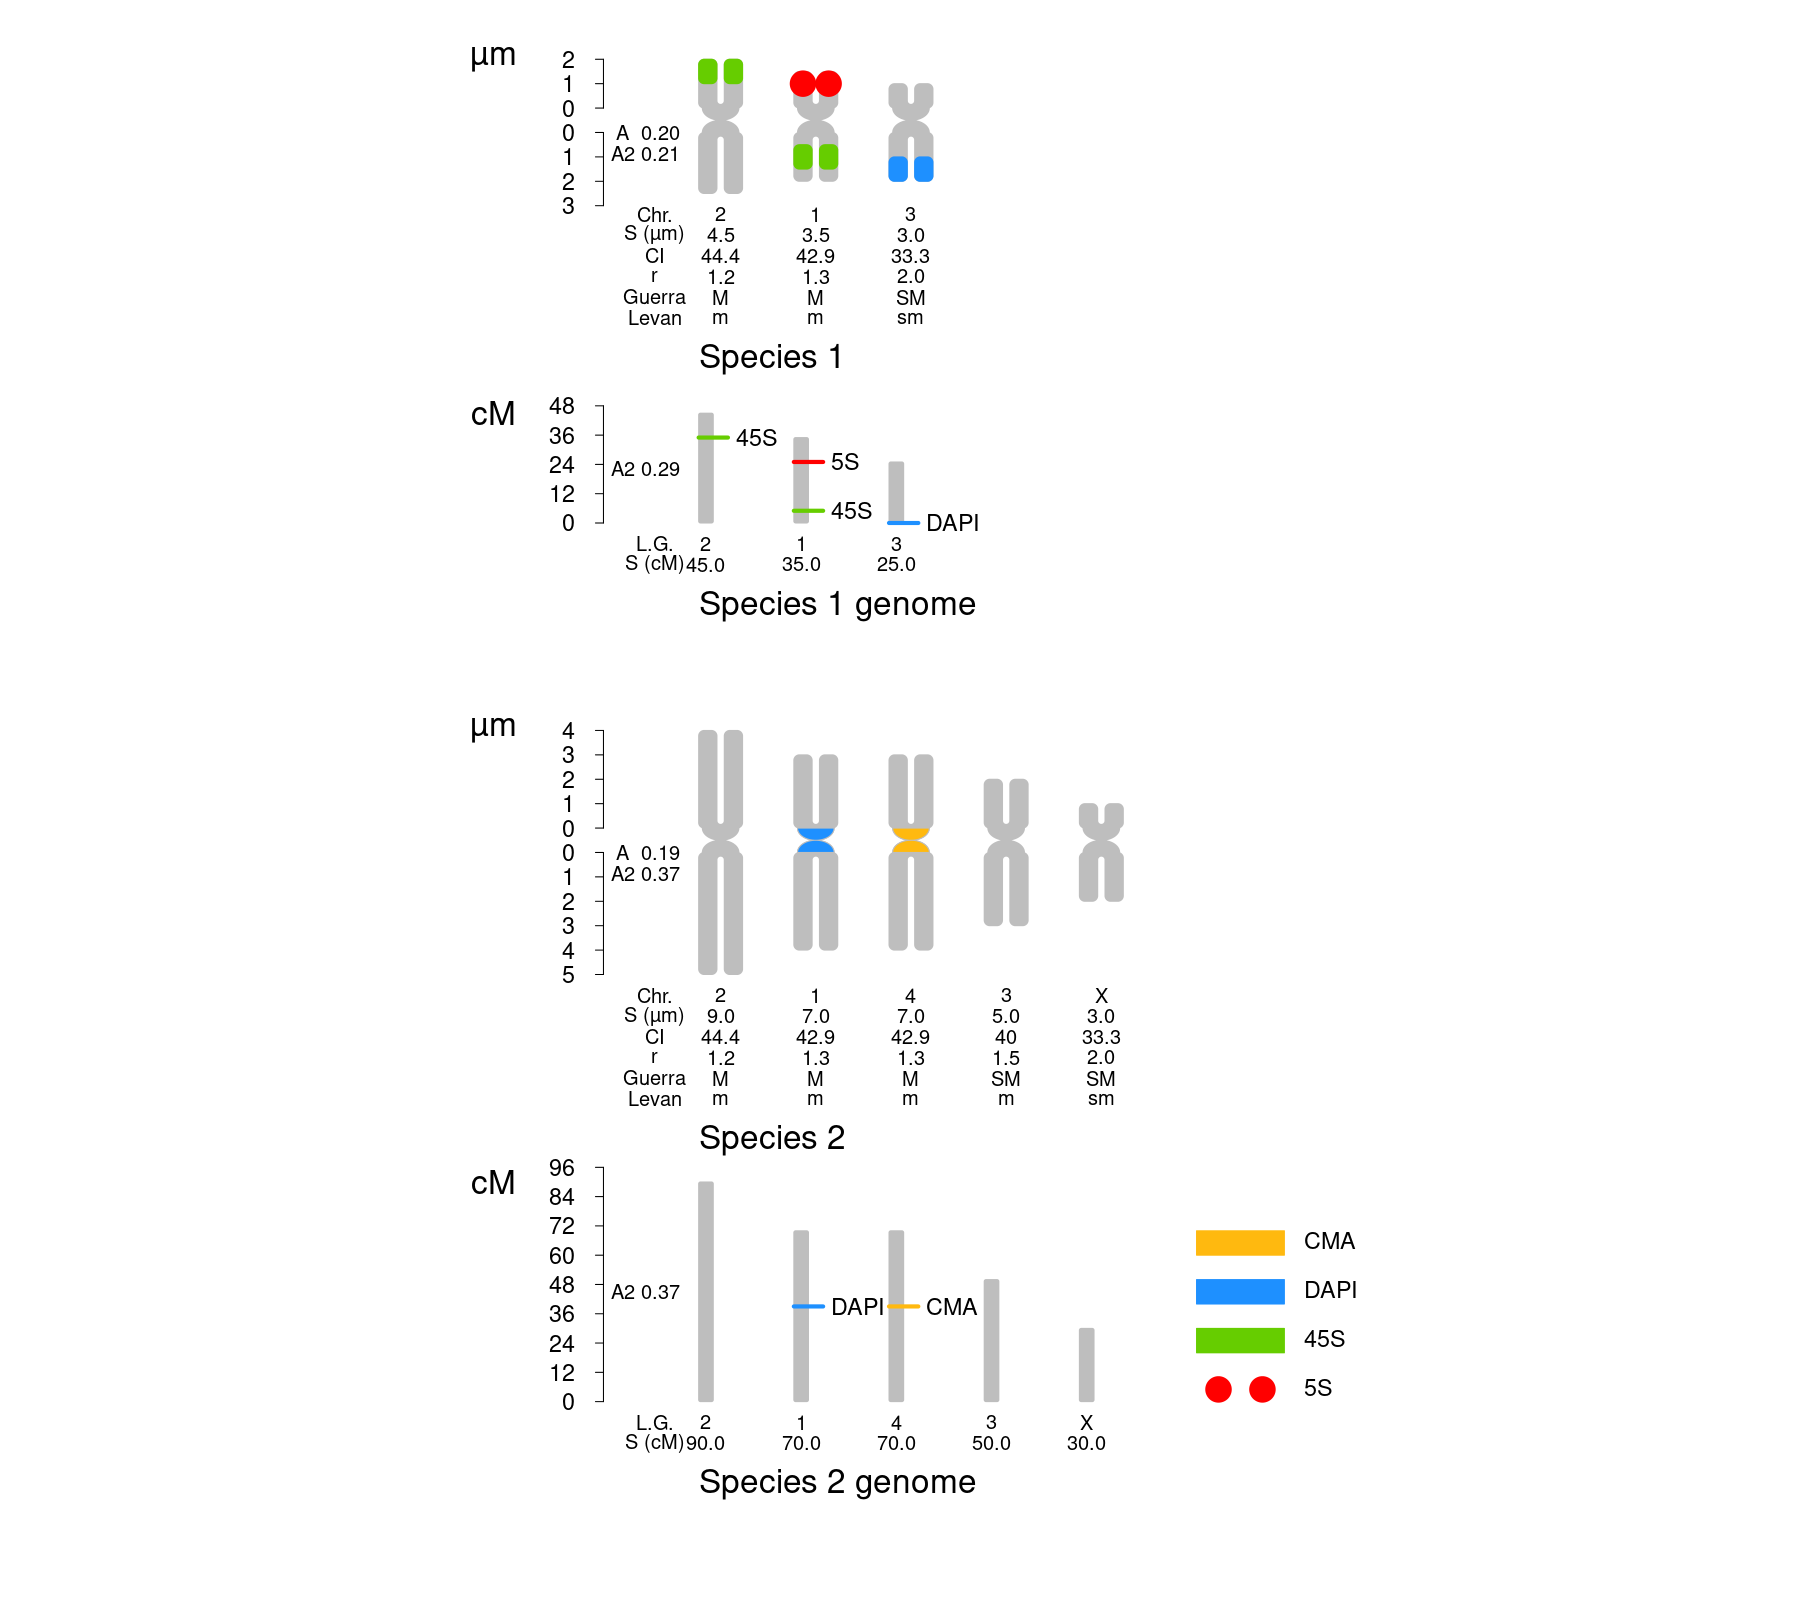

In [31]:
#fig.width=10, fig.height=10
# merge data.frames in micrometers and cM
bigdfOfChrSize3cM<-bigdfOfChrSize3Mb[1:8,]
bigdfOfChrSize3cM$chrSize<-bigdfOfChrSize3cM$chrSize/100000
mixedThreeSpChrSize <- plyr::rbind.fill(bigdfOfChrSize[1:8,], bigdfOfChrSize3cM)

# sort by OTU name
mixedThreeSpChrSize <- mixedThreeSpChrSize[order(mixedThreeSpChrSize$OTU),]

# create data with cM. markSize col. is not necessary because style is cM
bigdfOfMarks3cM<-bigdfOfMarks3Mb
bigdfOfMarks3cM$markPos<-bigdfOfMarks3Mb$markPos/100000
bigdfOfMarks3cM$markSize<-NA
# As we want only the cM idiograms to be plotted as cM (lines), change mark names 
bigdfOfMarks3cM$markName<-paste0("cM",bigdfOfMarks3cM$markName)

# d.f of all marks
mixedThreeSpMarks <- plyr::rbind.fill(bigdfOfMarks , bigdfOfMarks3cM)

# create a data.frame with mark characteristics
mixedDfMarkStyle  <- makedfMarkColorMycolors(unique(mixedThreeSpMarks$markName), 
                                                            c("red","chartreuse3","dodgerblue","darkgoldenrod1")
                                                            )

# mark names of cM marks with "cM" style (lines): not dots, not squares
mixedDfMarkStyle[which(mixedDfMarkStyle$markName %in% 
                         grep("cM", mixedDfMarkStyle$markName, value=TRUE) ) ,]$style<-"cM"

par(mar=rep(0,4))
options(repr.plot.width = 1800/200, repr.plot.height = 1600/200, repr.plot.res = 200)
suppressMessages(
plotIdiograms(dfChrSize   = mixedThreeSpChrSize,  # chr. size data.frame
              dfMarkPos   = mixedThreeSpMarks,    # mark position data.frame
              dfMarkColor = mixedDfMarkStyle,     # mark style data.frame
              
              chrWidth=.6,                # width of chr.
              chrSpacing = .7,            # space among chr.
              
              specialOTUNames = bigdfOfMarks3cM$OTU, # OTUs in this object will have different ruler units 
              specialyTitle = "cM",       # ruler title for specialOTUNames
              specialChrWidth = .2,       # modify chr width of OTUs in specialOTUNames
              specialChrSpacing = 1.1,    # modify chr spacing of OTUs in specialOTUNames

              karHeight = 3,              # kar. height without interspace
              karHeiSpace = 6,            # vertical size of karyotype including spacer
              amoSepar = 3,               # separ. among kar.
              
              chrSize=TRUE,               # show chr. size under chr.
              indexIdTextSize=.6,         # font size of chr. name and indices
              distTextChr = .85,          # separation among chr. names and indices
              
              protruding = 1,             # extension of cM mark type
              pattern = "cM",             # regex pattern to remove from mark names
              markLabelSize=.7            # font size of mark legends
              ,legendWidth = 2            # legend items width
              ,fixCenBorder = TRUE        # use chrColor as border color of cen. or cen. marks
              ,lwd.cM = 2                 # thickness of cM marks 
              ,holocenNotAsChromatids=TRUE# do not use chromatids in holocen. kar.
              
              ,xPosRulerTitle = 4         # position of Mb or cM (title) in ruler               
              ,rulerPos= 0,               # ruler position
              ruler.tck=-0.005,           # ticks of ruler size and orientation
              rulerNumberPos =.7,         # position of numbers in ruler
              rulerNumberSize=0.7,        # font size of ruler numbers
              rulerIntervalcM = 12,       # ruler interval for OTU in specialOTUnames and MbThreshold not met
              ceilingFactor = 1,          # affects max. value in ruler. See also rulerInterval
              
              ylimBotMod = 0.4,           # modify ylim bottom argument
              ylimTopMod = 0              # modify ylim top argument
)
)